In [3]:
# IMPORTS
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import helper_nn as hnn
import fullyconnected_neuralnetwork as fc_nn

In [4]:
# LOAD DATASET: example, Fashion-MNIST (28x28 pixels, 1 channel, 10 classes)
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.FashionMNIST('../../../DL_PyTorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = datasets.FashionMNIST('../../../DL_PyTorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


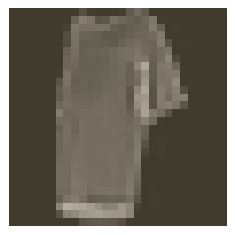

In [7]:
# CHECK DATSET
image, label = next(iter(trainloader))
print(trainset.classes)
hnn.imshow(image[0,:])

In [7]:
# Have a clear idea of the image tensor shape
# [Batch size, channels, width, height]
image.shape

torch.Size([64, 1, 28, 28])

In [8]:
# CREATE NETWORK
#input_size = 1*28*28 = 728
input_size = image.shape[2]*image.shape[3]
#output_size = 10
output_size = len(trainset.classes)
# Select desired number of hidden layers and their sizes
hidden_sizes = [512, 256, 128]
model = fc_nn.Network(input_size, output_size, hidden_sizes)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
# TRAIN
fc_nn.train(model, trainloader, testloader, criterion, optimizer, epochs=2)

Epoch: 1/2..  Training Loss: 1.645..  Test Loss: 0.990..  Test Accuracy: 0.613
Epoch: 1/2..  Training Loss: 1.044..  Test Loss: 0.762..  Test Accuracy: 0.715
Epoch: 1/2..  Training Loss: 0.890..  Test Loss: 0.701..  Test Accuracy: 0.732
Epoch: 1/2..  Training Loss: 0.773..  Test Loss: 0.686..  Test Accuracy: 0.731
Epoch: 1/2..  Training Loss: 0.772..  Test Loss: 0.637..  Test Accuracy: 0.749
Epoch: 1/2..  Training Loss: 0.739..  Test Loss: 0.617..  Test Accuracy: 0.763
Epoch: 1/2..  Training Loss: 0.696..  Test Loss: 0.570..  Test Accuracy: 0.777
Epoch: 1/2..  Training Loss: 0.645..  Test Loss: 0.550..  Test Accuracy: 0.796
Epoch: 1/2..  Training Loss: 0.678..  Test Loss: 0.557..  Test Accuracy: 0.792
Epoch: 1/2..  Training Loss: 0.620..  Test Loss: 0.559..  Test Accuracy: 0.797
Epoch: 1/2..  Training Loss: 0.599..  Test Loss: 0.544..  Test Accuracy: 0.800
Epoch: 1/2..  Training Loss: 0.605..  Test Loss: 0.523..  Test Accuracy: 0.803
Epoch: 1/2..  Training Loss: 0.626..  Test Loss: 0.5

In [11]:
# SAVE
filename = 'my_model_checkpoint.pth'
fc_nn.save_model(filename, model, input_size, output_size, hidden_sizes)

In [5]:
# LOAD
filename = 'my_model_checkpoint.pth'
model = fc_nn.load_model(filename)
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


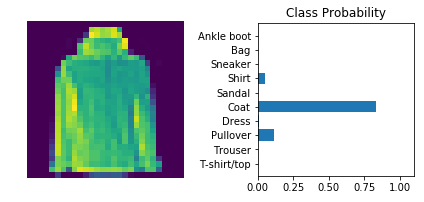

In [6]:
# INFER & VISUALIZE
model.eval()
images, labels = next(iter(testloader))
img = images[0]
#img = img.view(1, 28*28)
img = img.view(1, images.shape[2]*images.shape[3])
with torch.no_grad():
    output = model.forward(img)
ps = torch.exp(output)
hnn.view_classify(img.view(1, images.shape[2], images.shape[3]), ps, trainset.classes)

torch.Size([1, 28, 28])